In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df = sns.load_dataset('iris')
from sklearn.neighbors import KNeighborsClassifier

In [3]:
X_train = df[['petal_length','petal_width']]
species_to_num ={'setosa': 0,
                 'versicolor': 1,
                 'virginica': 2}
df['species']=df['species'].map(species_to_num)
y_train = df['species']

In [11]:
knn = KNeighborsClassifier(n_neighbors=50)

In [12]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

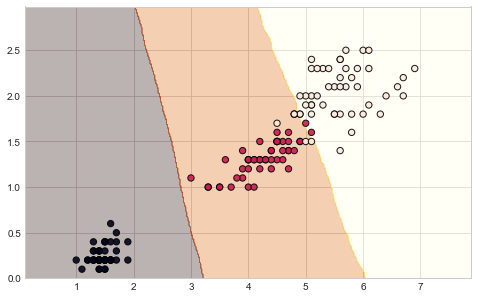

In [13]:
Xv = X_train.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y_train.min(), y_train.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

fig = plt.figure(figsize=(8,5))

ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3, 
                  );
plt.scatter(X_train.values[:, 0], X_train.values[:, 1], c=y_train, s=40, 
            alpha=0.9, edgecolors='k');